In [1]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedGroupKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pickle


In [2]:
churn_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
churn_df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [4]:
#Drop the customerID column which is non-numeric and not useful for scaling
# X = churn_df.drop(['Churn', 'customerID'], axis=1)
# y = churn_df['Churn']

X = churn_df[['OnlineSecurity', 'tenure', 'Contract','TotalCharges', 'MonthlyCharges']]
X
y = churn_df['Churn']
y
print(X.shape)
print(y.shape)


(7043, 5)
(7043,)


In [5]:
X = churn_df[['OnlineSecurity', 'tenure', 'Contract','TotalCharges', 'MonthlyCharges']].copy()  # Create a copy

for col in X.columns:
    if X[col].dtype == 'object':
        label_encoder = LabelEncoder()
        X[col] = label_encoder.fit_transform(X[col])

Visualisation Data

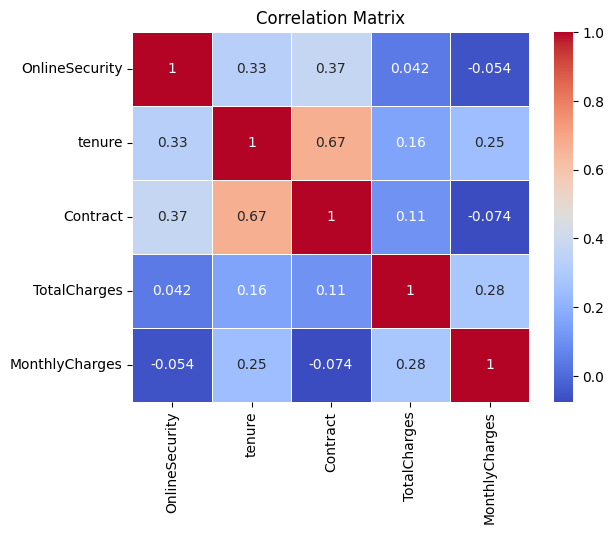

In [6]:
chosen_features = ['OnlineSecurity', 'tenure', 'Contract', 'TotalCharges', 'MonthlyCharges']
corr_matrix = X[chosen_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Interpreting the Matrix

Let's analyze some specific relationships:

Tenure and Contract: The strong positive correlation (0.67) suggests that customers with longer tenure tend to have longer contracts.
TotalCharges and MonthlyCharges: The moderate positive correlation (0.28) indicates that customers with higher total charges also tend to have higher monthly charges.
OnlineSecurity and Contract: The moderate positive correlation (0.37) suggests a possible relationship between customers who have online security and their contract length.

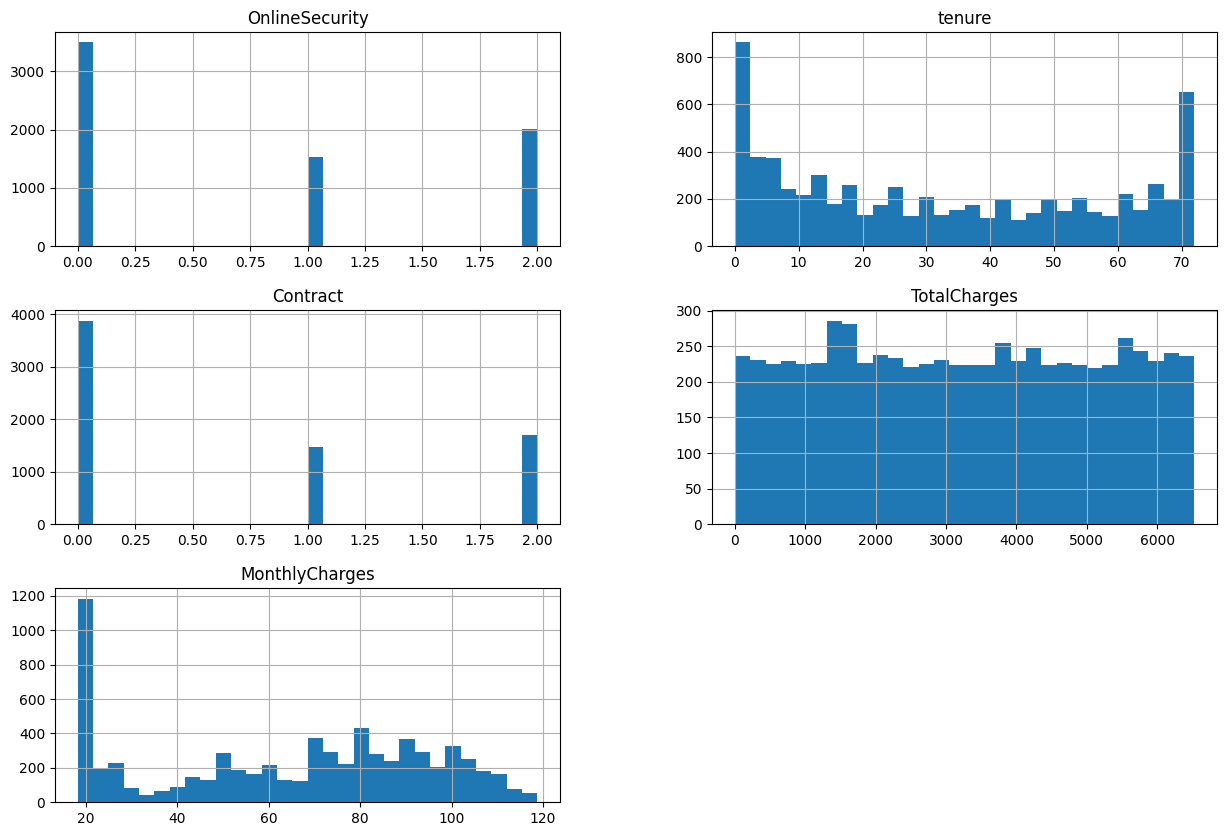

In [7]:
# Distribution Plots
X[['OnlineSecurity', 'tenure', 'Contract','TotalCharges', 'MonthlyCharges']].hist(bins=30, figsize=(15, 10))
plt.show()

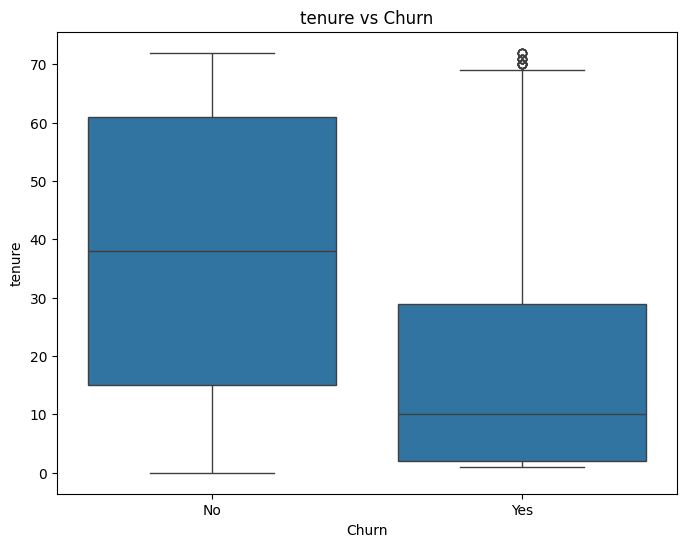

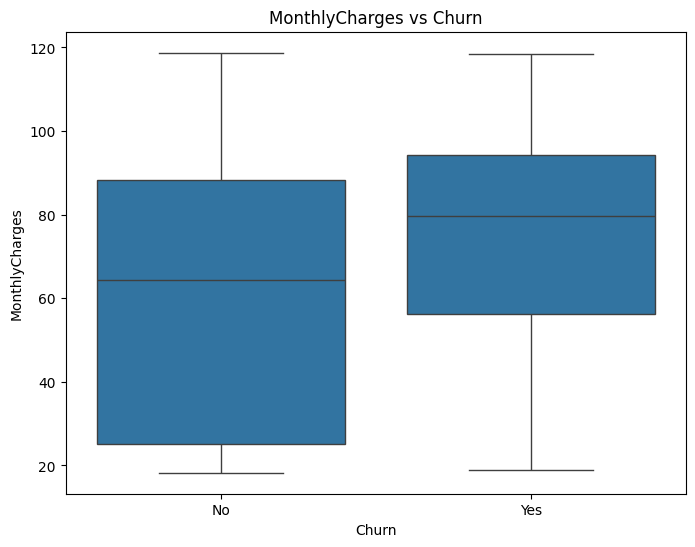

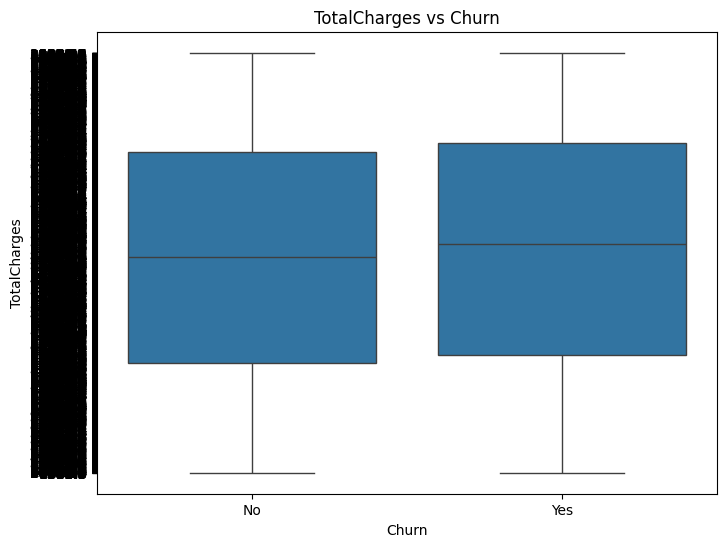

In [19]:
# Select numerical columns

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create separate plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    sns.boxplot(x='Churn', y=col, data=churn_df)
    plt.title(f'{col} vs Churn')
    plt.show()

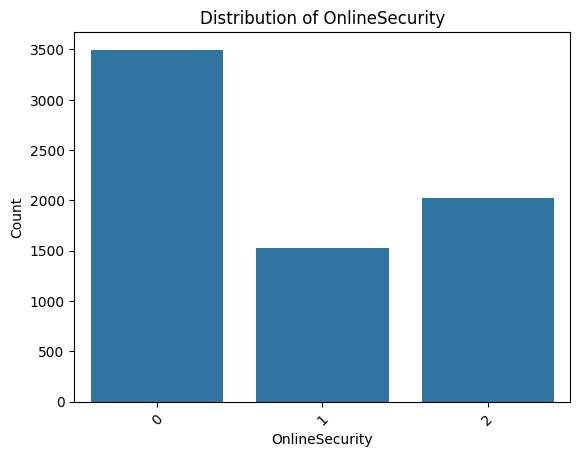

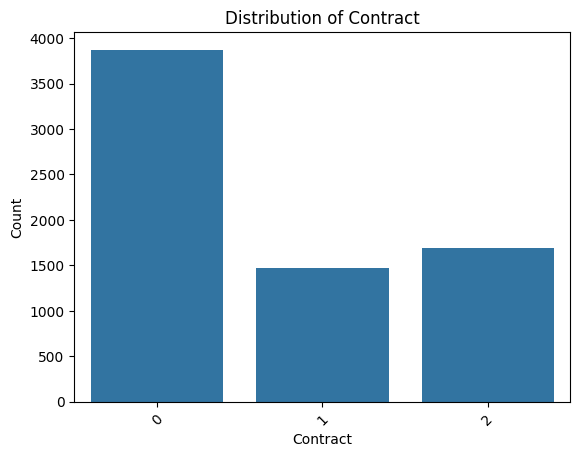

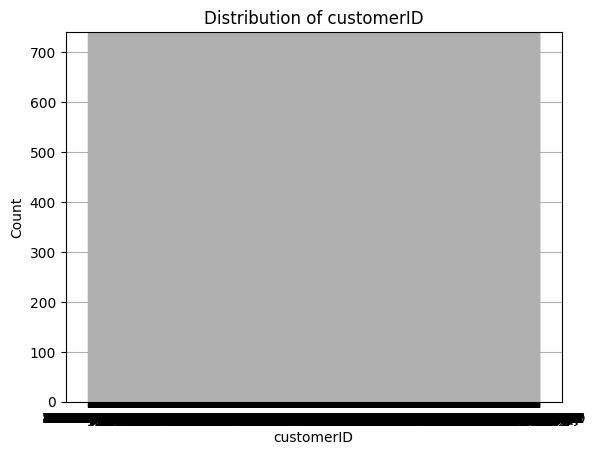

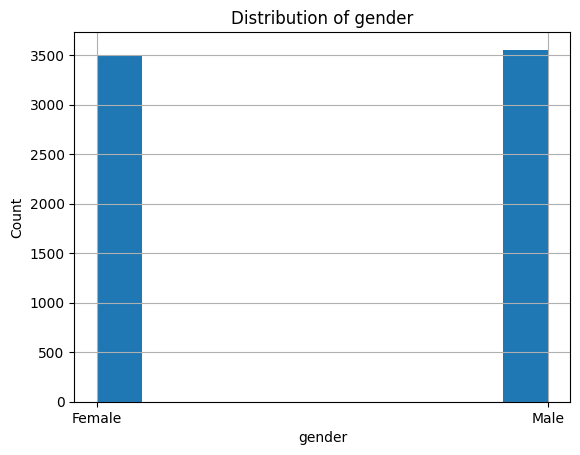

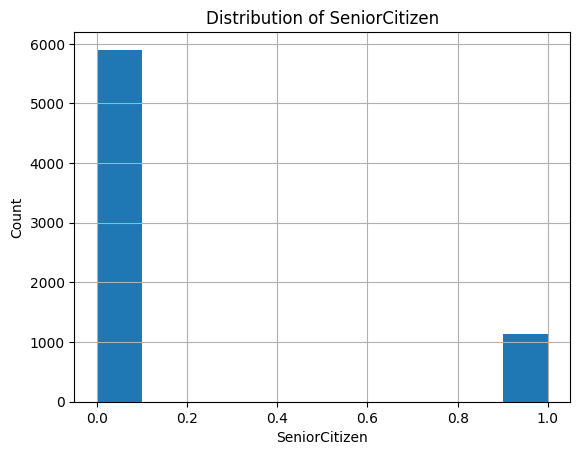

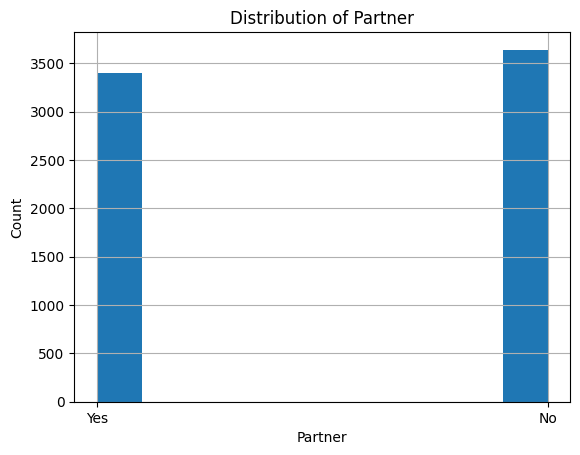

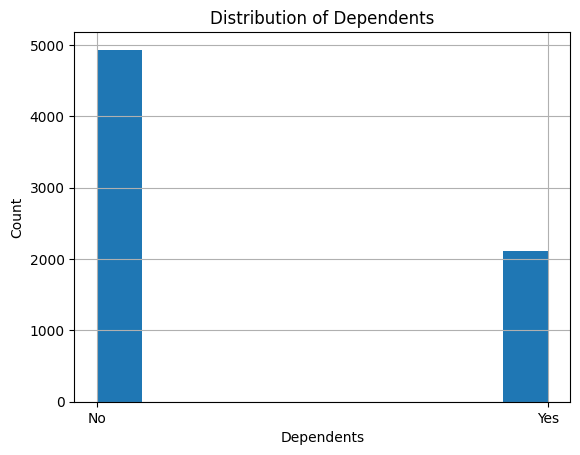

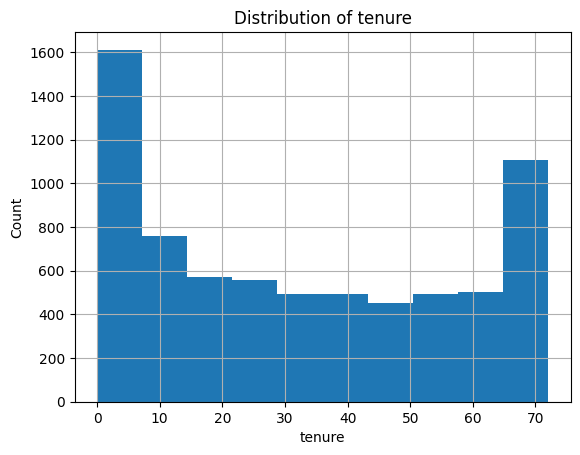

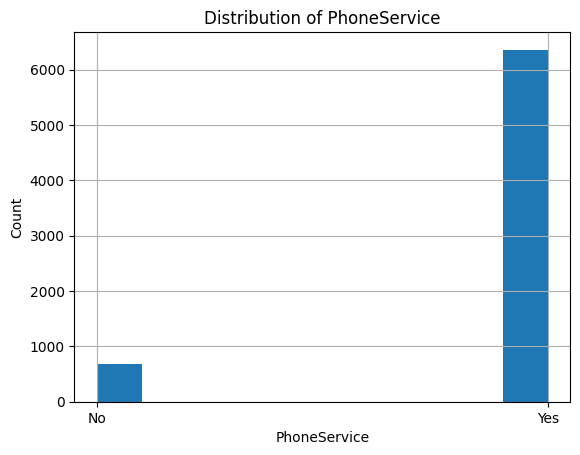

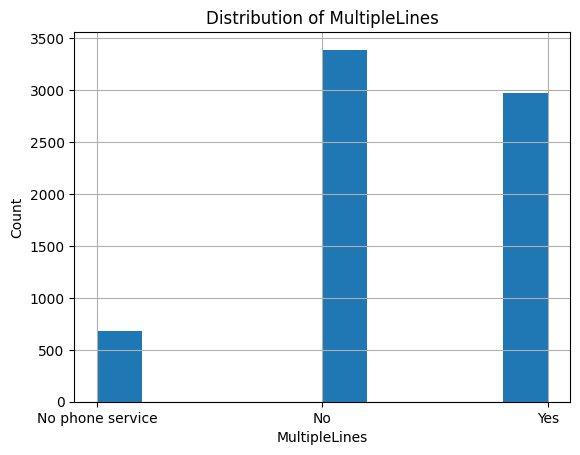

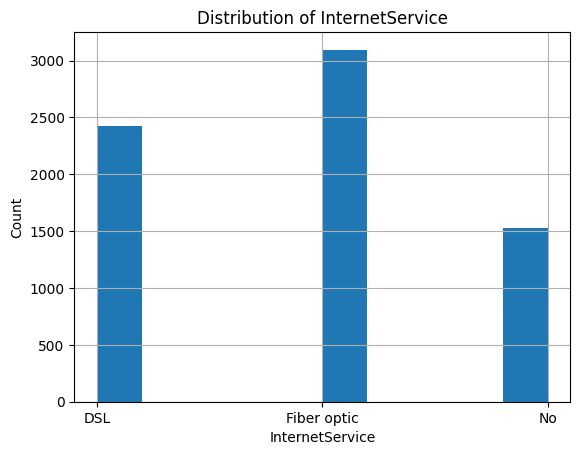

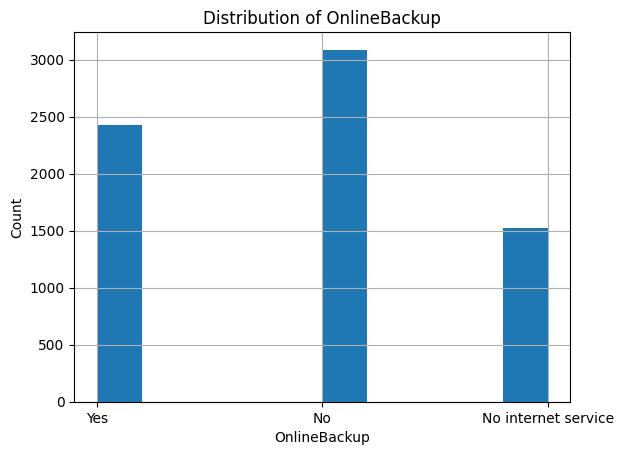

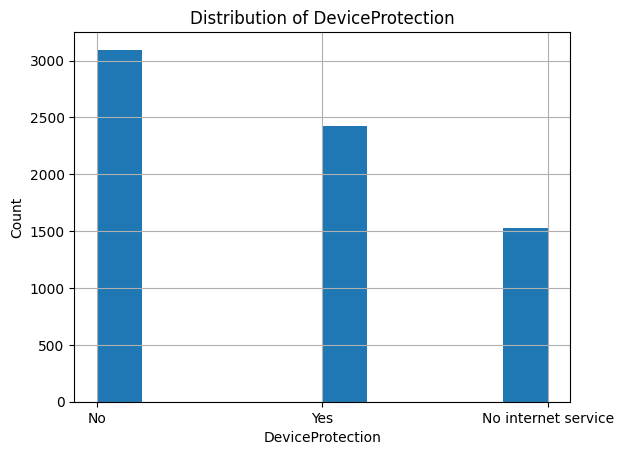

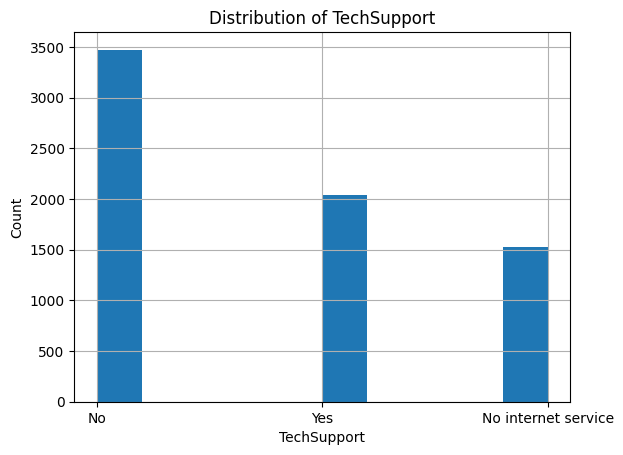

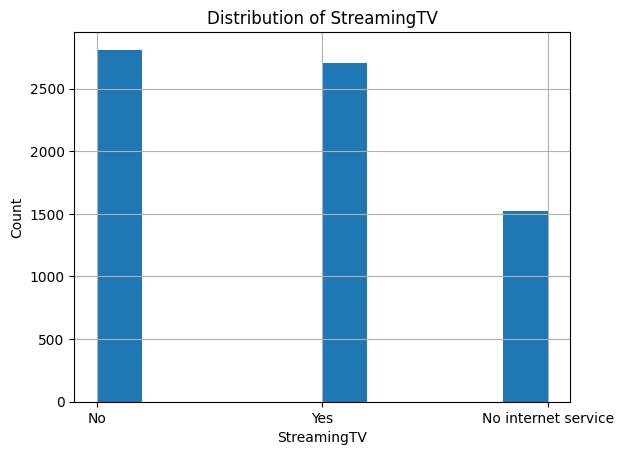

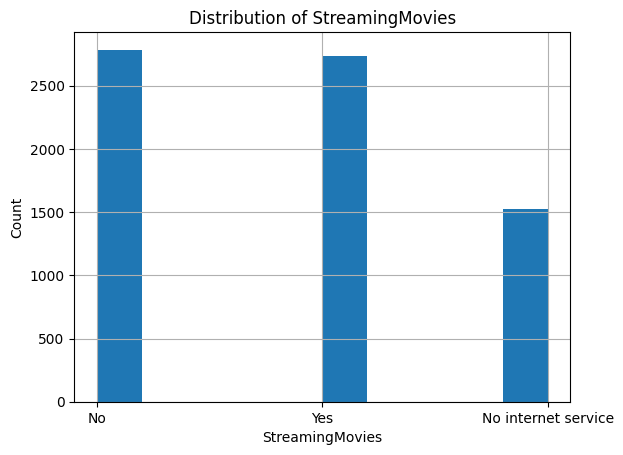

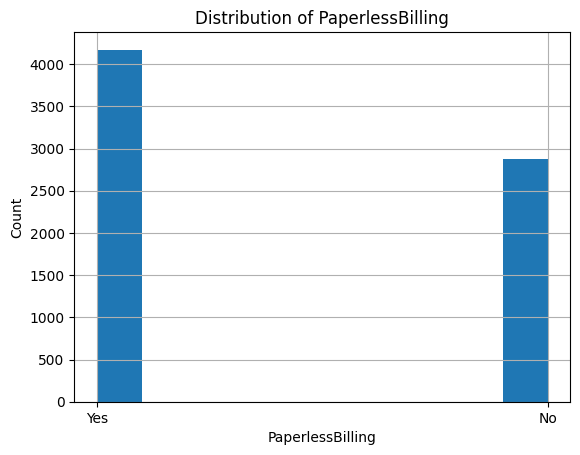

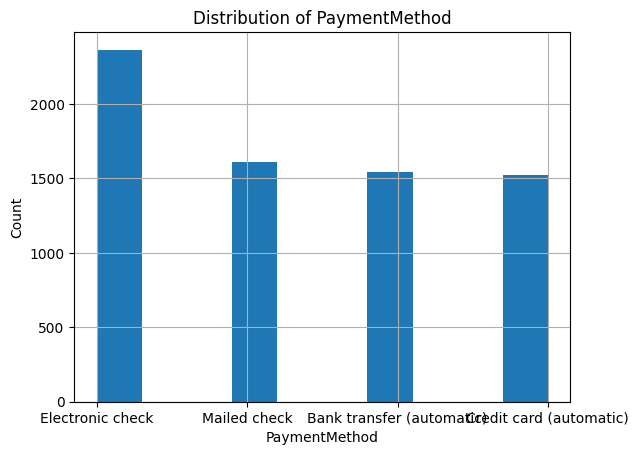

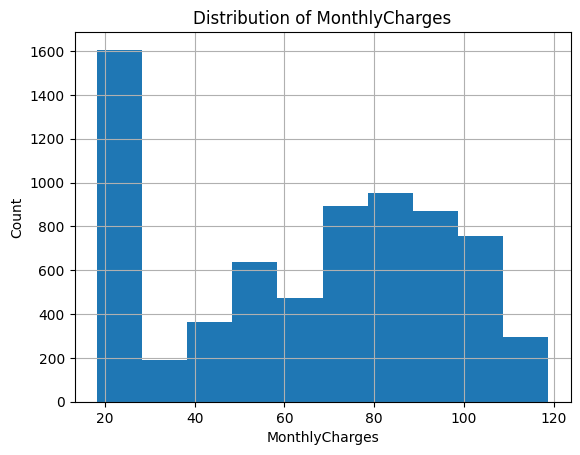

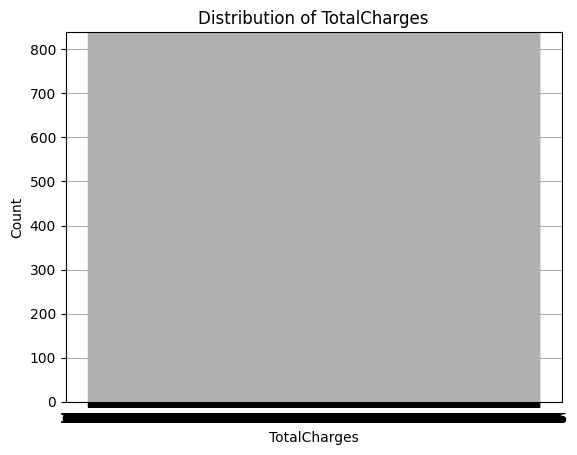

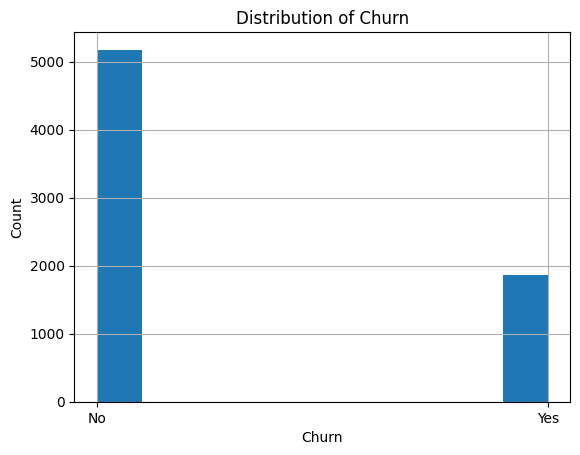

In [9]:
categorical_columns = ['OnlineSecurity', 'Contract']

# Loop through each categorical column and create a countplot
for col in categorical_columns:
  sns.countplot(x=col, data=X)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()


# Check for columns with potential numerical values (tenure, TotalCharges, MonthlyCharges)
numerical_columns = [col for col in churn_df.columns if col not in categorical_columns]

# Optional: Create histograms for numerical columns (if applicable)
for col in numerical_columns:
  churn_df[col].hist()
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

In [10]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Verify shapes after resetting indices
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4930, 5) (4930,)
(2113, 5) (2113,)


In [12]:
#Convert to NumPy arrays if they are not already
from sklearn.model_selection import StratifiedKFold
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
k_scores = []
k_range = range(1, 31)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_number = 1
    for train_index, test_index in cv.split(X_train_np, y_train_np):
        X_train_cv, X_test_cv = X_train_np[train_index], X_train_np[test_index]
        y_train_cv, y_test_cv = y_train_np[train_index], y_train_np[test_index]

        # Check the distribution of classes in each fold
        unique, counts = np.unique(y_train_cv, return_counts=True)
        class_distribution = dict(zip(unique, counts))
        print(f"Fold {fold_number}, k={k}, Class distribution: {class_distribution}")

        if len(X_train_cv) == 0 or len(X_test_cv) == 0:
            print(f"Empty train or test set found in fold {fold_number} for k={k}")

        fold_number += 1
    scores = cross_val_score(knn, X_train_np, y_train_np, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f"k={k}: CV Accuracy: {scores.mean():.4f}")


Fold 1, k=1, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 2, k=1, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 3, k=1, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 4, k=1, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 5, k=1, Class distribution: {'No': 2908, 'Yes': 1036}
k=1: CV Accuracy: 0.7039
Fold 1, k=2, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 2, k=2, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 3, k=2, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 4, k=2, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 5, k=2, Class distribution: {'No': 2908, 'Yes': 1036}
k=2: CV Accuracy: 0.7448
Fold 1, k=3, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 2, k=3, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 3, k=3, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 4, k=3, Class distribution: {'No': 2908, 'Yes': 1036}
Fold 5, k=3, Class distribution: {'No': 2908, 'Yes': 1036}
k=3: CV Accuracy: 0.7345
Fold 1, k=4, Class distribution: {'No': 

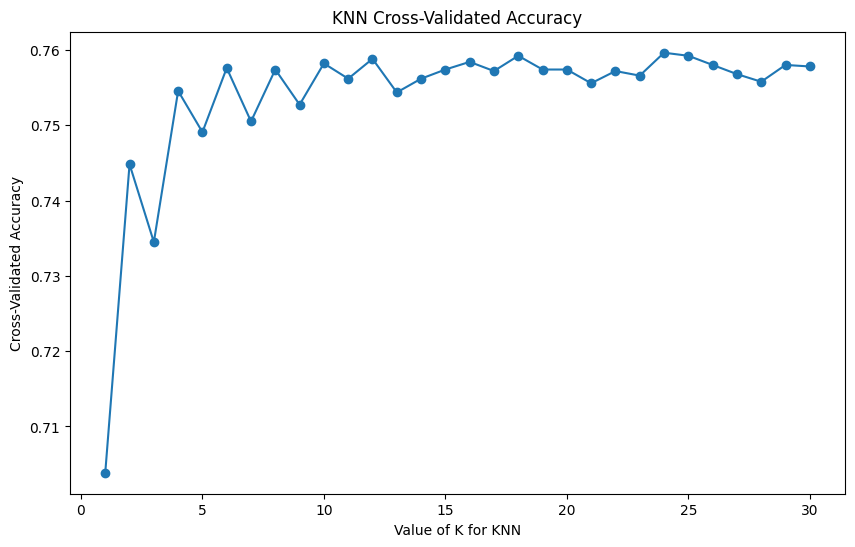

In [13]:
#plot the results on graph
plt.figure(figsize=(10, 6))

# Calculate the mean score for each k WITHOUT reshaping
plt.plot(k_range, k_scores, marker='o')

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy')
plt.show()

In [14]:
optimal_k = k_range[np.argmax(k_scores)]
print(f'The optimal k value is {optimal_k}')

The optimal k value is 24


In [15]:
 # Standardize the feature values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score


# Define classifiers to use
classifiers = {
        'Decision Tree': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(n_neighbors=24),
        'Gaussian NB': GaussianNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'Logistic Regression': LogisticRegression(random_state=0, max_iter=100, solver='lbfgs', multi_class='auto'),
        'SVM Linear': svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True),
        'SVM RBF': svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True),
        'SVM Polynomial': svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True),
        'SVM Sigmoid': svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True)
    }

# Train each classifier and evaluate using cross-validation
for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        cv = KFold(n_splits=5, random_state=1, shuffle=True)
        scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv)
        print(f'{name} CV Accuracy: {round(np.mean(scores) * 100, 2)} ± {round(np.std(scores) * 100, 2)}')

        # Predict on test set and print classification report
        y_pred = clf.predict(X_test)
        print(f'Classification Report for {name}')
        print(classification_report(y_test, y_pred))
        print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}\n')






Decision Tree CV Accuracy: 73.02 ± 0.44
Classification Report for Decision Tree
              precision    recall  f1-score   support

          No       0.81      0.83      0.82      1539
         Yes       0.52      0.49      0.50       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.73      0.74      0.74      2113

Accuracy Score: 73.73

KNN CV Accuracy: 79.09 ± 1.2
Classification Report for KNN
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.69      0.46      0.55       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113

Accuracy Score: 79.65

Gaussian NB CV Accuracy: 75.76 ± 1.52
Classification Report for Gaussian NB
              precision    recall  f1-score   support

          No       0.88      0

In [17]:
#Store KNN model


with open('knn_model_churnrate.pkl', 'wb') as file:
    pickle.dump(clf, file) # Now 'model' is defined

with open('churnrate_Scalar.pkl', 'wb') as file:
    pickle.dump(sc, file)

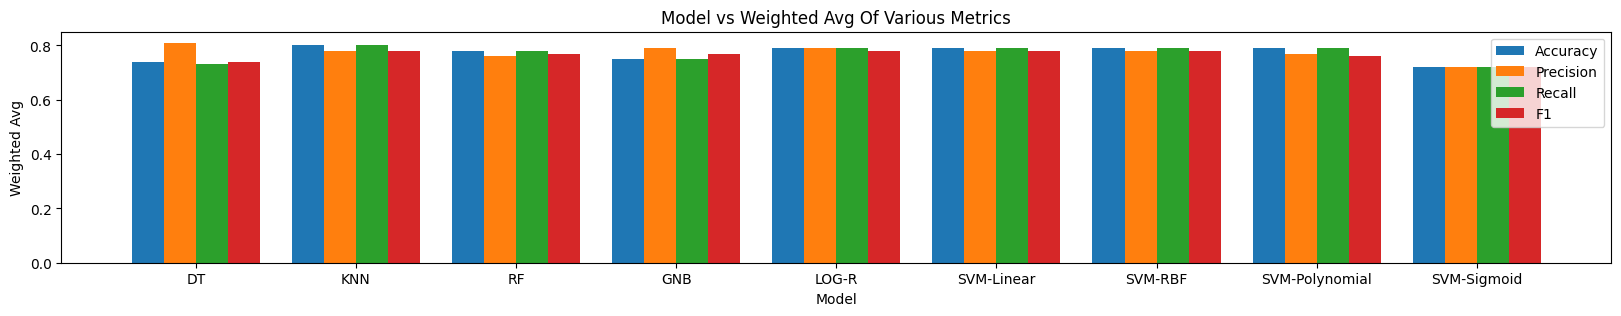

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Models
X = [ 'DT', 'KNN','RF', 'GNB', 'LOG-R', 'SVM-Linear', 'SVM-RBF', 'SVM-Polynomial', 'SVM-Sigmoid' ]

# Collect this information from the classification reports and store them in lists
accuracy = [0.74, 0.80, 0.78,0.75, 0.79, 0.79, 0.79, 0.79, 0.72]
precision = [0.81, 0.78, 0.76, 0.79, 0.79, 0.78, 0.78, 0.77, 0.72]
recall = [0.73,0.80, 0.78, 0.75, 0.79, 0.79, 0.79, 0.79, 0.72]
f1 = [0.74, 0.78, 0.77, 0.77, 0.78, 0.78, 0.78, 0.76, 0.72]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()